# Regression(회귀문제)

* 회귀란 유전학에서 기원이 된 개념 <br>
* 골턴이란 유전학자가 부모의 키와 아이들의 키 사이의 연관관계를 연구 <br>
* 현재 통계학에서는 단순회귀분석, 다중회귀분석을 사용 
    * 단순회귀분석: 하나의 종속변수와 하나의 독립변수 사이의 관계를 분석
    * 다중회귀분석: 하나의 종속변수와 여러 독립변수 사이의 관계를 분석

<br>
<img src="figure/1.png">
<br>
<a href="https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D">
figure1. 단순회귀분석
</a>
<br><br><br>

<img src="figure/2.jpg">
<br>
<a href="https://research.ics.aalto.fi/pml/software/gpstuff/demo_regression1.shtml">
figure2. 다중회귀분석
</a>
<br><br><br>


In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib 패키지 설치필요

<br><bar>
* 신경망 모델을 정의합니다.
* model이라는 신경망객체를 생성하면 __init__을 통해 변수가 weight, bias 값이 랜덤하게 초기화 됩니다.

In [31]:
# Define model and Loss
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
        self.b = tf.Variable(tf.zeros([1]))

    def __call__(self, inputs):
        return self.W * inputs + self.b

<br>

* loss를 계산해주는 함수를 만듭니다.
* loss는 square함수로 정의됩니다.

In [36]:
def compute_loss(y_data, y_pred):
    return tf.reduce_mean(tf.square(y_data-y_pred))

In [32]:
#신경망 생성
model = Model()

<br>

* 먼저 정답 label이 되는 데이터를 만들어 줍니다.
    * x데이터는 평균=0, 표준편차=0.55의 무작위 난수가 생성됩니다.
    * y데이터는 "y=3*x+2+noise" 관계식을 생성됩니다.

In [33]:
num_points = 1000
TRUE_W=3.0
TRUE_b=2.0
x_data = tf.random.normal([num_points],0.0,0.5)
noise = tf.random.normal([num_points],0.0,0.3)
y_data = x_data*TRUE_W+TRUE_b+noise

<br>

학습되는 과정을 시각적으로 보여줄 plot 함수를 만들어줍니다.

In [39]:
def plot(epoch):      
        plt.plot(x_data, y_data, 'bo')
        plt.plot(x_data, model(x_data), 'ro')
        plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(y_data, model(x_data)).numpy())))
        plt.show()

<br>



<br>

* Training 과정을 정의한다
    * with 컨텍스트 안에 실행된 모든 연산내용을 tape에 기록한다. 
    * tape.gradient를 이용해 gradient값을 구할 수 있다. = dw, db
    * gradient값을 이용해 weight parameter를 업데이트
    * gradient값을 이용해 bias parameter를 업데이트

=> epoch  1: w_true= 3.00, w_pred= 2.84; b_true= 2.00, b_pred= 1.99, loss= 0.10


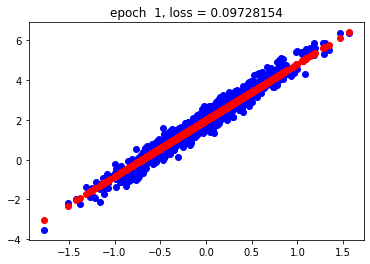

=> epoch  2: w_true= 3.00, w_pred= 2.85; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  3: w_true= 3.00, w_pred= 2.85; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  4: w_true= 3.00, w_pred= 2.86; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  5: w_true= 3.00, w_pred= 2.86; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  6: w_true= 3.00, w_pred= 2.87; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  7: w_true= 3.00, w_pred= 2.88; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  8: w_true= 3.00, w_pred= 2.88; b_true= 2.00, b_pred= 1.99, loss= 0.10
=> epoch  9: w_true= 3.00, w_pred= 2.88; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 10: w_true= 3.00, w_pred= 2.89; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 11: w_true= 3.00, w_pred= 2.89; b_true= 2.00, b_pred= 1.99, loss= 0.09


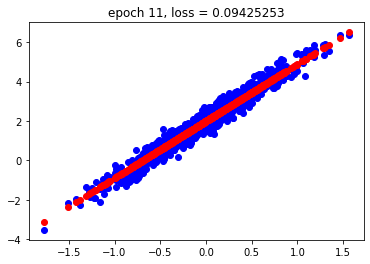

=> epoch 12: w_true= 3.00, w_pred= 2.90; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 13: w_true= 3.00, w_pred= 2.90; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 14: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 15: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 16: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 17: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 18: w_true= 3.00, w_pred= 2.92; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 19: w_true= 3.00, w_pred= 2.92; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 20: w_true= 3.00, w_pred= 2.92; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 21: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.99, loss= 0.09


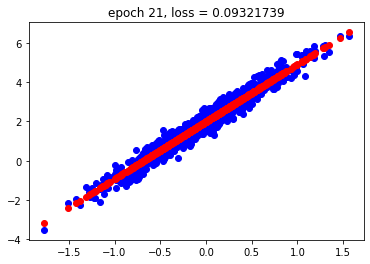

=> epoch 22: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 23: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 24: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 25: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 26: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 27: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 28: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 29: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 30: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 31: w_true= 3.00, w_pred= 2.94; b_true= 2.00, b_pred= 1.99, loss= 0.09


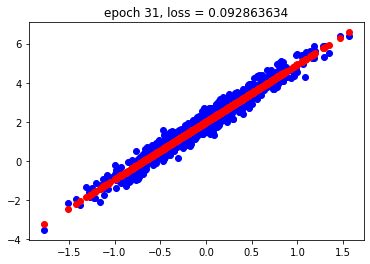

=> epoch 32: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 33: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 34: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 35: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 36: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 37: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 38: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 39: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 40: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 41: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09


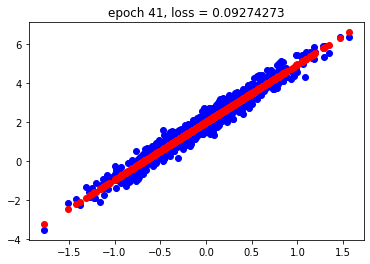

=> epoch 42: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 43: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 44: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 45: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 46: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 47: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 48: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 49: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 50: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 51: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09


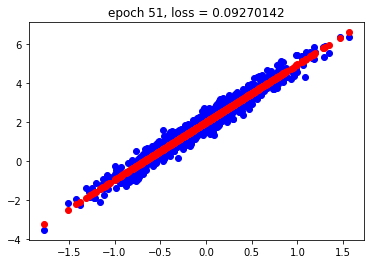

=> epoch 52: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 53: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 54: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 55: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 56: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 57: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 58: w_true= 3.00, w_pred= 2.96; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 59: w_true= 3.00, w_pred= 2.97; b_true= 2.00, b_pred= 1.99, loss= 0.09
=> epoch 60: w_true= 3.00, w_pred= 2.97; b_true= 2.00, b_pred= 1.99, loss= 0.09


In [48]:
# Define a training loop
learning_rate = 0.1
for epoch in range(60):
    with tf.GradientTape() as tape: #
        loss = compute_loss(y_data, model(x_data))

    dW, db = tape.gradient(loss, [model.W, model.b]) #loss를 통해 주어진 입력변수(model.W,model.b)에 대한 gradient값을 계산해줍니다.
    model.W.assign_sub(learning_rate * dW) #위에서 얻은 가중치 gradient값을 이용해 weight parameter를 업데이트합니다. 
    model.b.assign_sub(learning_rate * db) #위에서 얻은 가중치 gradient값을 이용해 bias parameter를 업데이트합니다.

    print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, TRUE_W, model.W.numpy(), TRUE_b, model.b.numpy(), loss.numpy()))
    if (epoch) % 10 == 0: plot(epoch + 1)
        